In [1]:
import os
from pathlib import Path
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gns_utils import split_dataframe, csv_log_to_dataframe

## Model-0010000 succeeds but Model-0750000 fails

In [2]:
data_dir = Path("1_true_grad_accuracy/results")
data = pd.concat([csv_log_to_dataframe(data_dir / file) for file in os.listdir(data_dir)], ignore_index=True)
data

/Users/egecimsir/Desktop/GenAI Practical/Critical-Multitask-Batch-Sizes-in-Diffusion-Models/gns_utils.py:164: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["runtime"] = pd.to_datetime(df["runtime"])
/Users/egecimsir/Desktop/GenAI Practical/Critical-Multitask-Batch-Sizes-in-Diffusion-Models/gns_utils.py:164: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["runtime"] = pd.to_datetime(df["runtime"])
/Users/egecimsir/Desktop/GenAI Practical/Critical-Multitask-Batch-Sizes-in-Diffusion-Models/gns_utils.py:164: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["runtime"] = pd.t

,model,true_portion,diff_steps,B,b,reps,t_min,t_max,accumulate,epoch,...,ckpt_dir,vis_dir,save_fig,date,gns_est,g_norm,b_true,runtime,user,host
0,0010000.pt,0.5,1000,2500,25,5,NaN,NaN,True,False,...,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,2025-01-28 02:03:10,3.262382,1.036614,25000,00:08:54.943879,cimsir,basalt.cip.ifi.lmu.de
1,0010000.pt,0.5,1000,2500,25,5,NaN,NaN,True,False,...,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,2025-01-28 02:42:20,3.137675,1.036454,25000,00:08:47.624477,cimsir,basalt.cip.ifi.lmu.de
2,0010000.pt,0.5,1000,2500,25,5,NaN,NaN,True,False,...,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,2025-01-28 17:15:07,6.946759,1.038726,25000,00:10:04.787752,cimsir,basalt.cip.ifi.lmu.de
3,0010000.pt,0.1,1000,2500,25,5,NaN,NaN,True,False,...,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,2025-01-28 01:20:48,2.051962,1.030378,5000,00:04:24.266915,cimsir,basalt.cip.ifi.lmu.de
4,0010000.pt,0.1,1000,2500,25,5,NaN,NaN,True,False,...,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,2025-01-28 02:35:00,0.825525,1.026069,5000,00:04:24.933039,cimsir,basalt.cip.ifi.lmu.de
5,0010000.pt,0.1,1000,2500,25,5,NaN,NaN,True,False,...,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,2025-01-28 17:07:36,0.746371,1.023740,5000,00:04:31.742532,cimsir,basalt.cip.ifi.lmu.de
6,0010000.pt,0.2,1000,2500,25,5,NaN,NaN,True,False,...,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,2025-01-28 01:57:28,2.481508,1.030459,10000,00:05:36.398353,cimsir,basalt.cip.ifi.lmu.de
7,0010000.pt,0.2,1000,2500,25,5,NaN,NaN,True,False,...,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,2025-01-28 18:00:10,2.298279,1.034712,10000,00:06:25.197141,cimsir,basalt.cip.ifi.lmu.de


In [3]:
meta, param, res = split_dataframe(data)
meta

,date,runtime,user,host,ckpt_dir,vis_dir,save_fig,accumulate,epoch,verbose,no_seed,no_warnings
0,2025-01-28 02:03:10,00:08:54.943879,cimsir,basalt.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
1,2025-01-28 02:42:20,00:08:47.624477,cimsir,basalt.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
2,2025-01-28 17:15:07,00:10:04.787752,cimsir,basalt.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
3,2025-01-28 01:20:48,00:04:24.266915,cimsir,basalt.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
4,2025-01-28 02:35:00,00:04:24.933039,cimsir,basalt.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
5,2025-01-28 17:07:36,00:04:31.742532,cimsir,basalt.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
6,2025-01-28 01:57:28,00:05:36.398353,cimsir,basalt.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True
7,2025-01-28 18:00:10,00:06:25.197141,cimsir,basalt.cip.ifi.lmu.de,checkpoints,/home/c/cimsir/GenAI_Practical/gns_experiments...,NaN,True,False,False,False,True


In [4]:
df = pd.concat([param, res], axis=1).drop(["t_min", "t_max", "diff_steps"], axis=1)
df

,model,true_portion,gns_est,g_norm,b_true,runtime
0,0010000.pt,0.5,3.262382,1.036614,25000,00:08:54.943879
1,0010000.pt,0.5,3.137675,1.036454,25000,00:08:47.624477
2,0010000.pt,0.5,6.946759,1.038726,25000,00:10:04.787752
3,0010000.pt,0.1,2.051962,1.030378,5000,00:04:24.266915
4,0010000.pt,0.1,0.825525,1.026069,5000,00:04:24.933039
5,0010000.pt,0.1,0.746371,1.023740,5000,00:04:31.742532
6,0010000.pt,0.2,2.481508,1.030459,10000,00:05:36.398353
7,0010000.pt,0.2,2.298279,1.034712,10000,00:06:25.197141


In [5]:
df = df.groupby("true_portion").mean("gns_est")[["gns_est"]]
df

,gns_est
true_portion,
0.1,1.207953
0.2,2.389894
0.5,4.448939


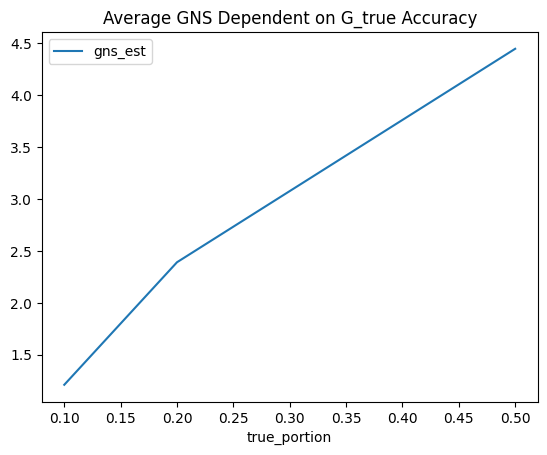

In [6]:
df.plot()
plt.title("Average GNS Dependent on G_true Accuracy")
plt.show()

In [9]:
test_df = pd.DataFrame({
    "cofee": ["espresso", "türk"],
    "pH": [0.1, 0.5]
})

In [13]:
test_df[test_df["pH"] > 0.3]

,cofee,pH
1,türk,0.5
